In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import keras

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Using TensorFlow backend.


In [2]:
os.listdir('.')

['.DS_Store', 'apartment.ipynb', '.ipynb_checkpoints', 'Apartment.csv']

In [3]:
# 공공데이터 csv 에러 또는 한글 깨짐 해결법
# https://teddylee777.github.io/pandas/%EA%B3%B5%EA%B3%B5%EB%8D%B0%EC%9D%B4%ED%84%B0-%ED%95%9C%EA%B8%80%EA%B9%A8%EC%A7%90%ED%98%84%EC%83%81-%ED%95%B4%EA%B2%B0%EB%B0%A9%EB%B2%95

data = pd.read_csv('Apartment.csv',thousands = ',')

In [4]:
data.head()

,시군구,번지,본번,부번,단지명,전용면적,계약년월,계약일,거래금액,층,건축년도,도로명
0,강원도 강릉시 견소동,202,202,0,송정한신,43.380,202004,4,10000,9,1997,경강로2539번길 8
1,강원도 강릉시 견소동,202,202,0,송정한신,84.930,202004,7,17300,8,1997,경강로2539번길 8
2,강원도 강릉시 견소동,202,202,0,송정한신,84.945,202004,10,14000,6,1997,경강로2539번길 8
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,59.990,202004,7,13650,1,2005,경강로2539번길 22
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,202004,11,23700,12,2005,경강로2539번길 22


In [5]:
addr = data['시군구'].str.split(' ')

#addr = addr[:][0] + addr[:][1]
for i in range(addr.size):
    addr[i] = addr[i][0] + addr[i][1]

In [6]:
data['지역'] = addr
data.drop('시군구', axis=1, inplace=True)

In [7]:
data.head()

,번지,본번,부번,단지명,전용면적,계약년월,계약일,거래금액,층,건축년도,도로명,지역
0,202,202,0,송정한신,43.380,202004,4,10000,9,1997,경강로2539번길 8,강원도강릉시
1,202,202,0,송정한신,84.930,202004,7,17300,8,1997,경강로2539번길 8,강원도강릉시
2,202,202,0,송정한신,84.945,202004,10,14000,6,1997,경강로2539번길 8,강원도강릉시
3,289,289,0,송정해변신도브래뉴아파트,59.990,202004,7,13650,1,2005,경강로2539번길 22,강원도강릉시
4,289,289,0,송정해변신도브래뉴아파트,84.990,202004,11,23700,12,2005,경강로2539번길 22,강원도강릉시


In [8]:
data['지역'].unique().size

266

In [9]:
data['지역'].value_counts()

경기도남양주시       922
경기도화성시        806
인천광역시남동구      744
대구광역시달서구      730
경기도시흥시        723
경기도부천시        705
인천광역시연수구      668
경기도평택시        651
인천광역시부평구      638
인천광역시서구       575
경기도의정부시       557
경기도김포시        552
충청남도천안서북구     523
강원도원주시        510
충청북도청주흥덕구     504
경상남도김해시       482
경기도용인기흥구      480
광주광역시북구       474
경기도안산단원구      472
대전광역시서구       462
경상북도구미시       453
경기도고양덕양구      448
충청남도아산시       418
충청남도천안동남구     415
경상남도양산시       406
전라북도전주완산구     404
대구광역시북구       403
경기도고양일산서구     393
광주광역시광산구      392
인천광역시미추홀구     391
             ... 
전라남도진도군         6
강원도철원군          6
전라북도진안군         6
세종특별자치시연동면      5
경상남도남해군         5
인천광역시강화군        5
전라북도임실군         5
경상남도의령군         5
경상북도영덕군         5
강원도양구군          5
세종특별자치시어진동      4
전라남도곡성군         4
전라남도담양군         4
전라북도장수군         4
세종특별자치시반곡동      4
경상북도영양군         4
강원도영월군          4
경상북도봉화군         4
경상북도성주군         4
경상남도산청군         3
세종특별자치시연서면      3
경상북도청송군         3
전라남도구례군         2
전라북도무주군         2
강원도화천군    

In [10]:
data['면적금액'] = data['거래금액'] / data['전용면적']

In [11]:
data.head()

,번지,본번,부번,단지명,전용면적,계약년월,계약일,거래금액,층,건축년도,도로명,지역,면적금액
0,202,202,0,송정한신,43.380,202004,4,10000,9,1997,경강로2539번길 8,강원도강릉시,230.520977
1,202,202,0,송정한신,84.930,202004,7,17300,8,1997,경강로2539번길 8,강원도강릉시,203.697162
2,202,202,0,송정한신,84.945,202004,10,14000,6,1997,경강로2539번길 8,강원도강릉시,164.812526
3,289,289,0,송정해변신도브래뉴아파트,59.990,202004,7,13650,1,2005,경강로2539번길 22,강원도강릉시,227.537923
4,289,289,0,송정해변신도브래뉴아파트,84.990,202004,11,23700,12,2005,경강로2539번길 22,강원도강릉시,278.856336


In [12]:
data[['지역','면적금액','거래금액']].groupby(['지역']).mean().astype(int).sort_values(by='면적금액')

,면적금액,거래금액
지역,,
전라남도영암군,56,2804
전라남도고흥군,83,4406
세종특별자치시소정면,84,5000
강원도영월군,89,3792
전라북도진안군,95,5516
충청북도단양군,115,5273
세종특별자치시전의면,115,5800
경상북도청도군,116,7887
강원도정선군,117,6364


In [13]:
data.isnull().sum()

번지      5
본번      0
부번      0
단지명     0
전용면적    0
계약년월    0
계약일     0
거래금액    0
층       0
건축년도    0
도로명     0
지역      0
면적금액    0
dtype: int64

In [14]:
#heatmap_data = data[['전용면적', '거래금액', '층', '건축년도', '지역', '면적금액']] 

#colormap = plt.cm.RdBu
#plt.figure(figsize=(14, 12))
#plt.title('Pearson Correlation of Features', y=1.05, size=15)
#sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
#           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})
#
#del heatmap_data



In [15]:
data['전용면적'] = data['전용면적'].round().astype(int)

In [16]:
data['전용면적'].head()

0    43
1    85
2    85
3    60
4    85
Name: 전용면적, dtype: int64

In [17]:
data[['건축년도','전용면적','거래금액']].groupby(['건축년도','전용면적']).mean().head()

거래금액
건축년도 전용면적              
1961 56    17450.000000
1962 36     2475.000000
     50     5300.000000
1966 29    36500.000000
1969 36    11583.333333

건축년도
1961    AxesSubplot(0.125,0.125;0.775x0.755)
1962    AxesSubplot(0.125,0.125;0.775x0.755)
1966    AxesSubplot(0.125,0.125;0.775x0.755)
1969    AxesSubplot(0.125,0.125;0.775x0.755)
1970    AxesSubplot(0.125,0.125;0.775x0.755)
1971    AxesSubplot(0.125,0.125;0.775x0.755)
1972    AxesSubplot(0.125,0.125;0.775x0.755)
1973    AxesSubplot(0.125,0.125;0.775x0.755)
1974    AxesSubplot(0.125,0.125;0.775x0.755)
1975    AxesSubplot(0.125,0.125;0.775x0.755)
1976    AxesSubplot(0.125,0.125;0.775x0.755)
1977    AxesSubplot(0.125,0.125;0.775x0.755)
1978    AxesSubplot(0.125,0.125;0.775x0.755)
1979    AxesSubplot(0.125,0.125;0.775x0.755)
1980    AxesSubplot(0.125,0.125;0.775x0.755)
1981    AxesSubplot(0.125,0.125;0.775x0.755)
1982    AxesSubplot(0.125,0.125;0.775x0.755)
1983    AxesSubplot(0.125,0.125;0.775x0.755)
1984    AxesSubplot(0.125,0.125;0.775x0.755)
1985    AxesSubplot(0.125,0.125;0.775x0.755)
1986    AxesSubplot(0.125,0.125;0.775x0.755)
1987    AxesSubplot(0.125,0.125;0.775x0.755)
1988 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x1187921e0> (for post_execute):


KeyboardInterrupt: 

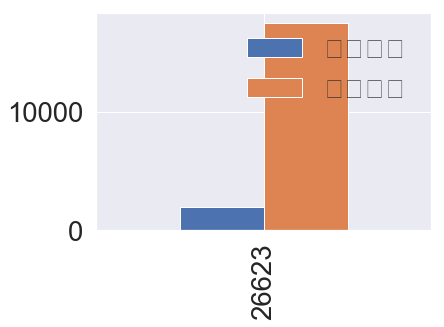

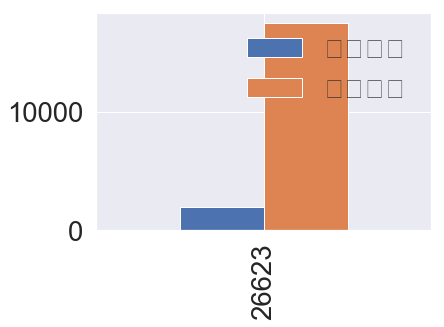

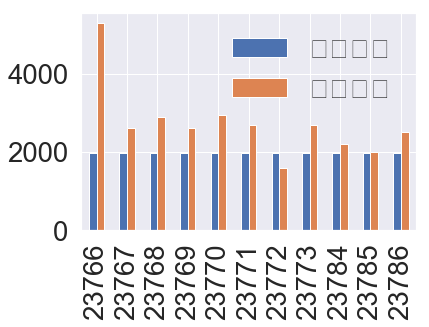

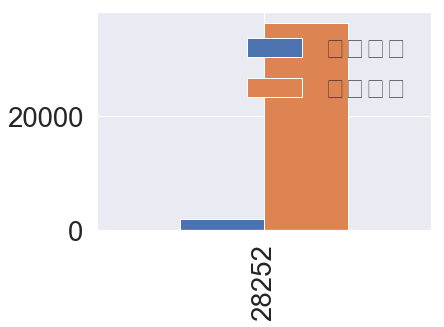

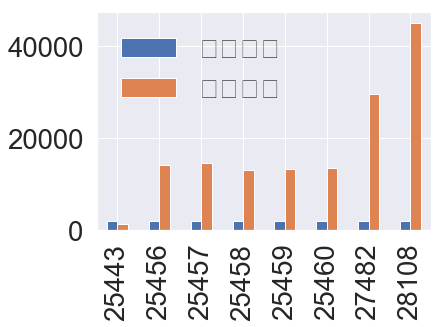

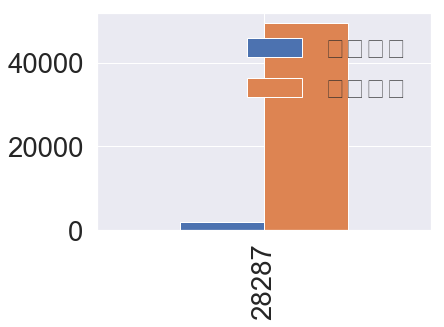

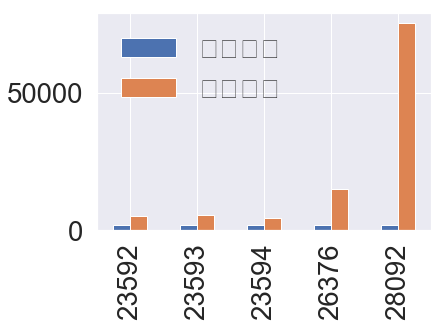

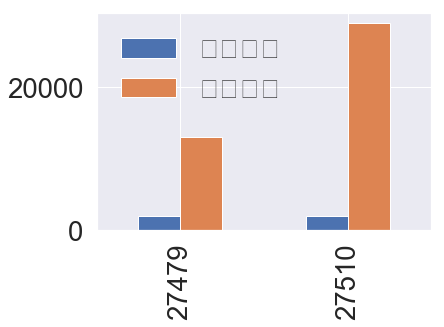

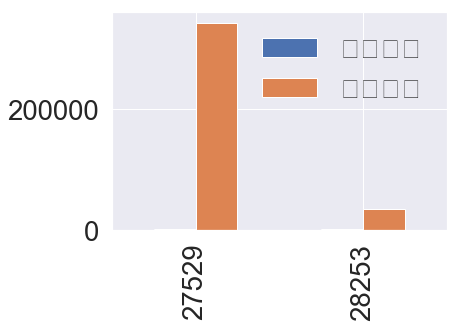

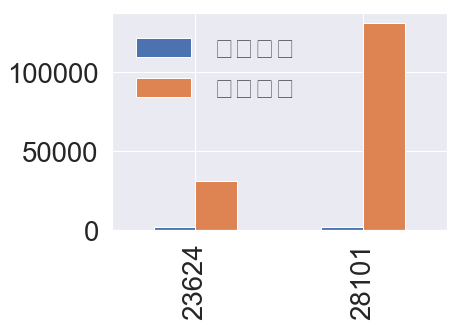

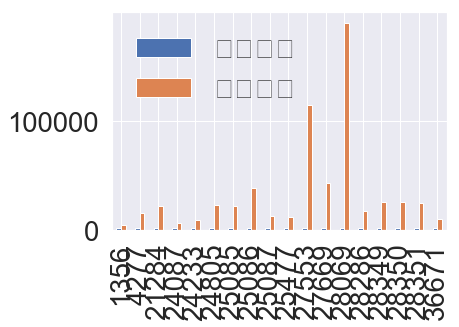

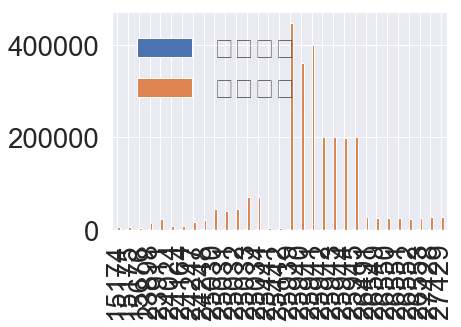

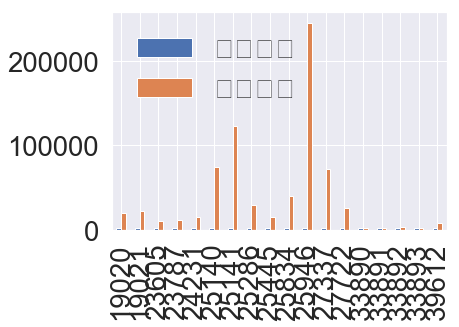

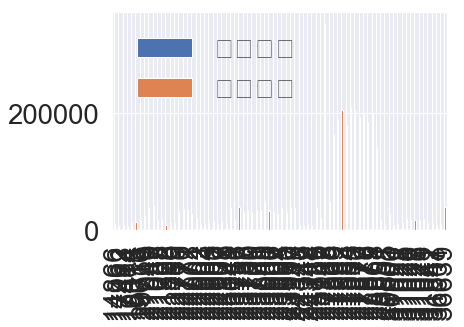

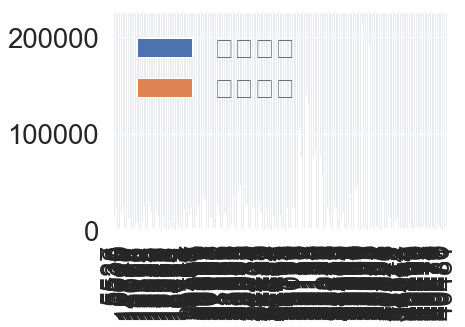

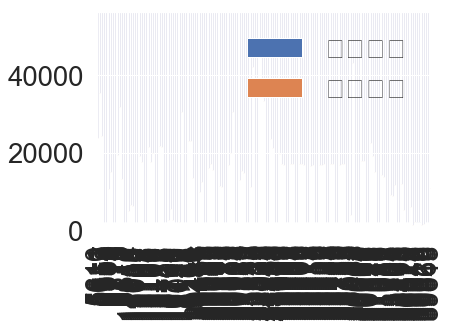

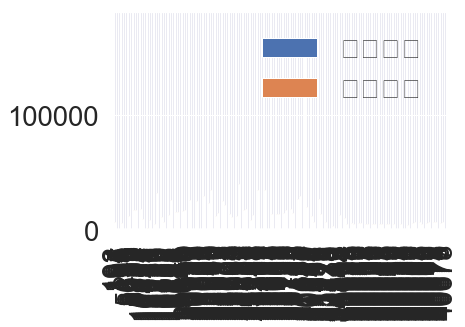

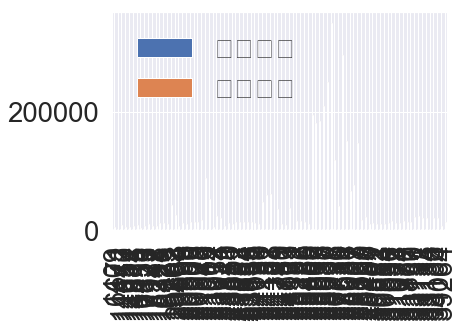

In [ ]:
#data[['건축년도','거래금액']].groupby('건축년도').plot.bar()
